In [1]:
from drought.visualization import plot
from drought.data import pipeline
import matplotlib.pyplot as plt
import pandas as pd

<b> Get GEDI Footprints per Polygon by Year and Month </b>

In [2]:
shot_distribution = pipeline.get_shots_per_polygon()

The .groupby() method used in aggregation will not account for any missing months, so these are manually added as below so that it is easier to see in the chart where data is lacking.

In [ ]:
for polygon in range(1,9):
    start = [2019, 4]
    end = [2022, 6]

    while start != end:
        if not ((shot_distribution['year'] == start[0]) \
                & (shot_distribution['month'] == start[1]) \
                & (shot_distribution['polygon_id'] == polygon)).any():
                
                shot_distribution = shot_distribution.append({'year': start[0], 
                                      'month': start[1], 
                                      'polygon_id': polygon,
                                      'number': 0}, ignore_index = True)
        
        if start[1] != 12:
            start[1] += 1
        else:
            start[0] += 1
            start [1] = 1

The resulting df needs to be sorted by year and month so that the x axis of the chart will show months in the correct order. Additionally, year and month columns are converted to proper datetime objects. 

In [7]:
shot_distribution = shot_distribution.sort_values(by=['year','month'])

shot_distribution['date'] = pd.to_datetime(shot_distribution['year'] \
                                           .astype(str) + 
                                           shot_distribution['month'] \
                                            .astype(str),
                                        format = '%Y%m') \
                                          .dt.strftime('%m-%y')

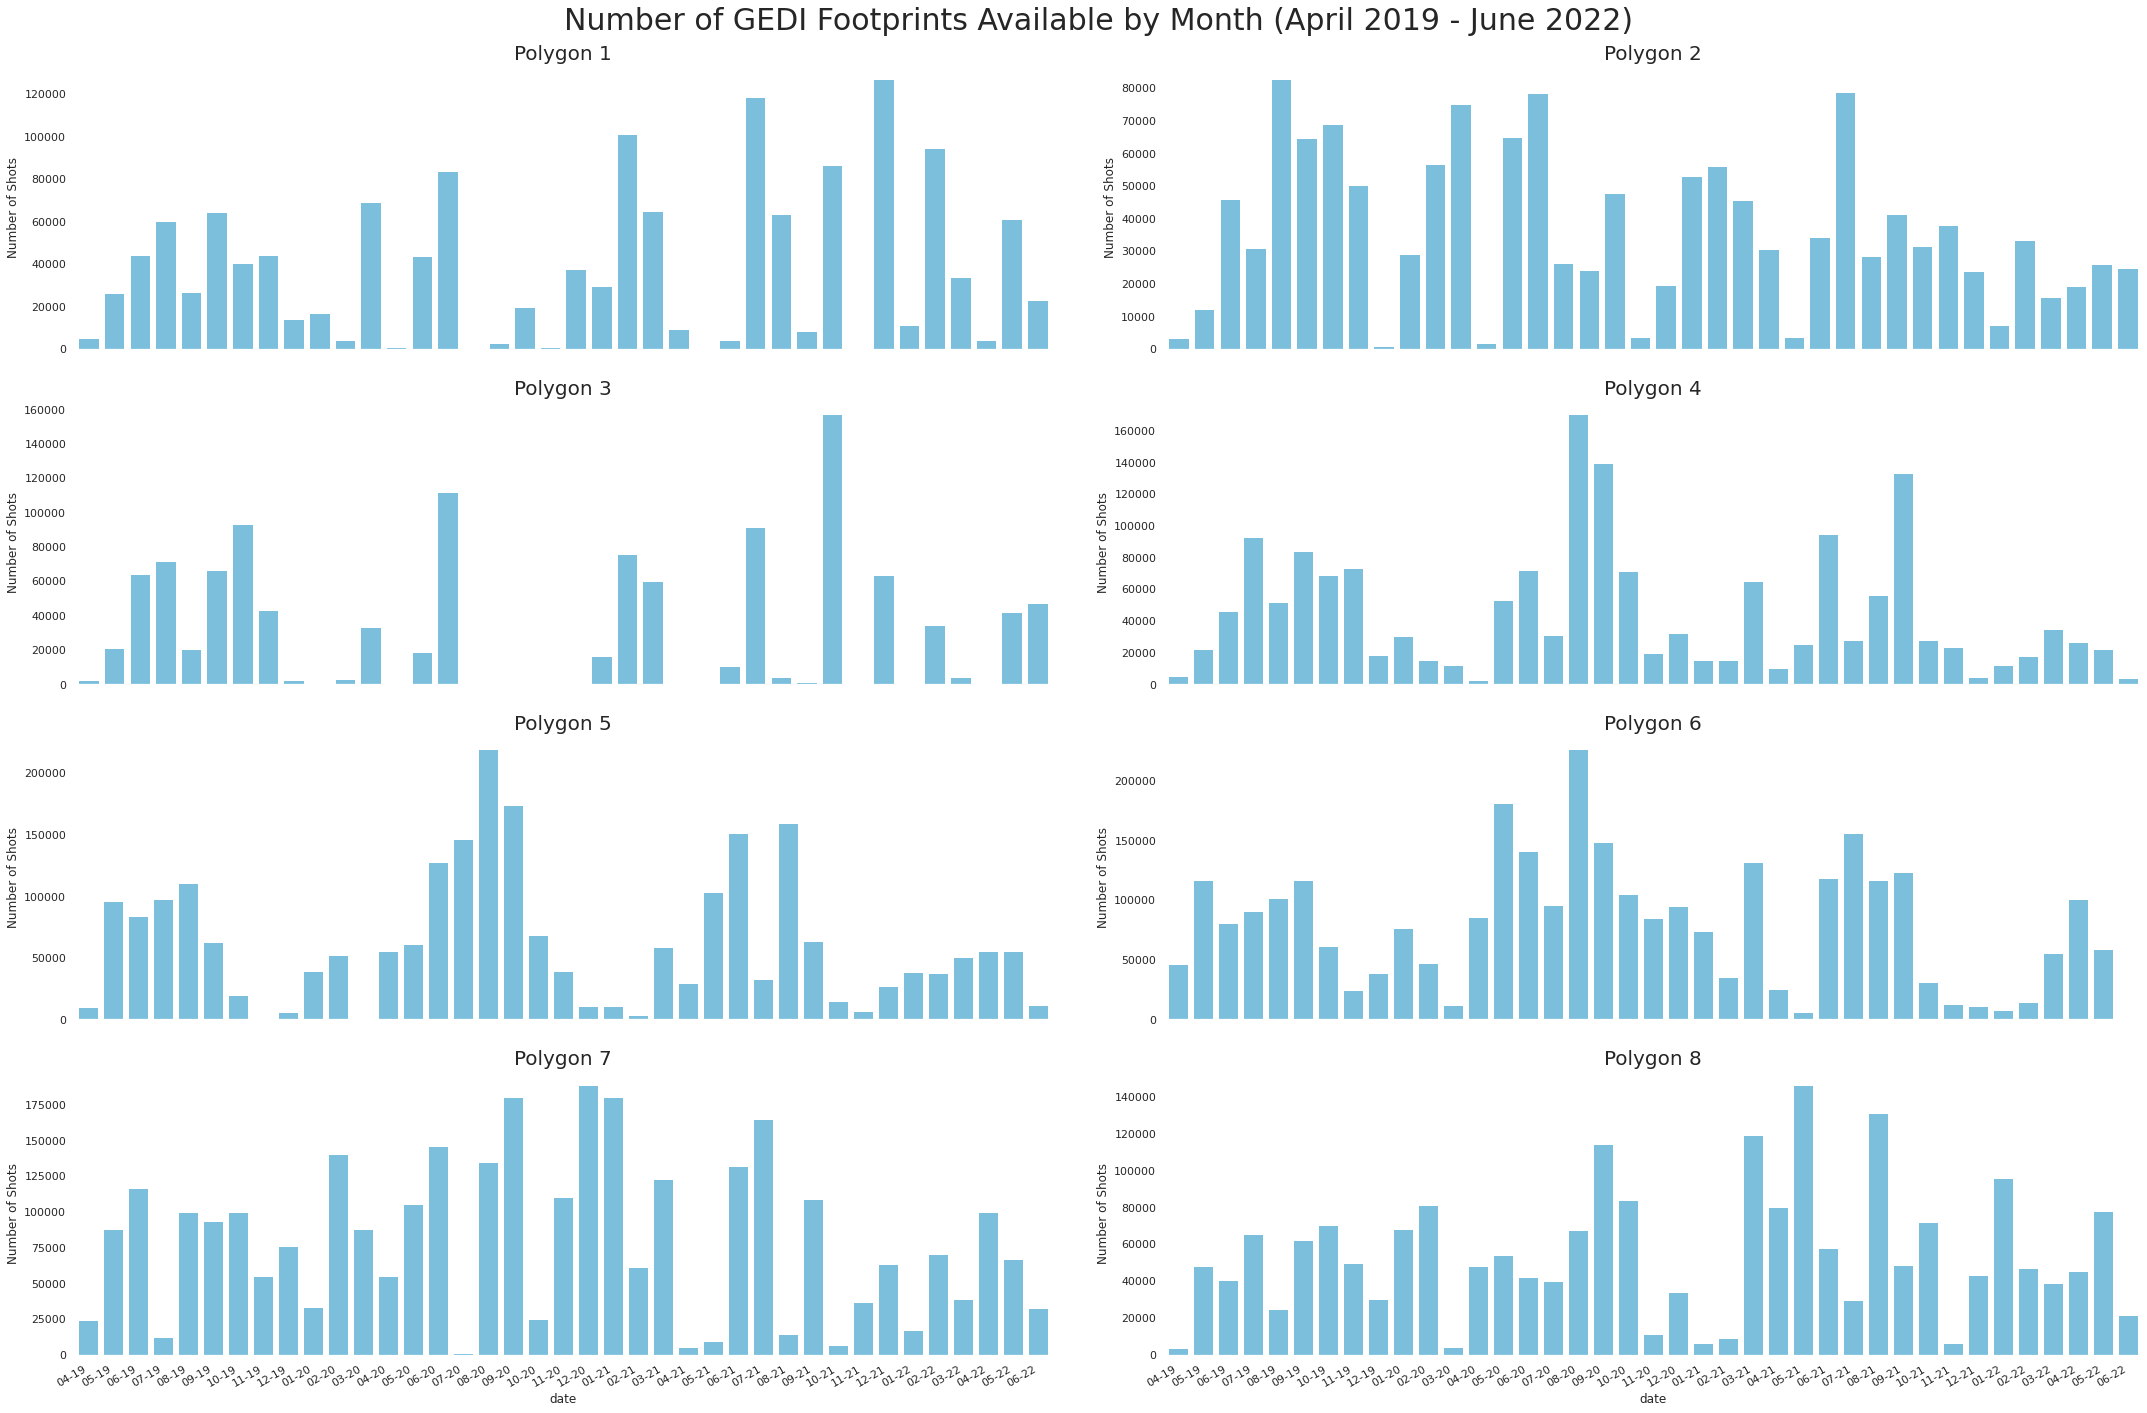

In [8]:
fig, ax = plot.barplot_per_polygon(shot_distribution, 
                                        x='date',
                                        y='number',
                                        ylabel ='Number of Shots',
                                        title="Number of GEDI Footprints Available by Month (April 2019 - June 2022)") # noqa: E501

fig.autofmt_xdate()